In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [ ]:
print(len(train_images))
train_images[0].shape

60000


(28, 28)

In [ ]:
# Conv2D 사용
# tf.keras.layers.Conv2D

# 채널을 만들어 주기 위한 reshape
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 0~1 사이 값으로 정규화
train_images, test_images = train_images/255.0, test_images/255.0


In [ ]:
train_labels[0]

5

In [ ]:
model = models.Sequential()

# 2차원 이미지를 가져오겠다는 것 => Conv2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # filter 32개, filter크기는 (3, 3)
# filters : 몇 개의 필터를 줄것인지 => 각 필터마다 해당하는 특징을 잡아냄

# filter는 겹치면서 slicing 28 - 3 + 1 (input_size - filter_size + last_filter) => 26, 26으로 변환
# pooling은 겹치지 않음

# 2차원 이미지를 pooling
# 층 쌓기
model.add(layers.MaxPooling2D((2, 2))) # pooling 특징을 강조해서 뽑아낸다고 생각하면 편함
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# flatten 순서대로 일렬로 펴겠다는 것(fully connected layer로 만들기 위함)
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
# weight update
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',# 다중 클래스인데 원핫인코딩이 아닌경우
              metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1453 - accuracy: 0.9547
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 61s 32m

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0288 - accuracy: 0.9913


In [ ]:
test_accuracy

0.9912999868392944

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
"""
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 

model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
"""
# functional API
inputs = layers.Input(shape=(28, 28, 1))

conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)(inputs)
pool1 = layers.MaxPooling2D(padding='same')(conv1)

conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)(pool1)
pool2 = layers.MaxPooling2D(padding='same')(conv2)

conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)(pool2)
pool3 = layers.MaxPooling2D(padding='same')(conv3)

pool3_flat = layers.Flatten()(pool3)

dense4 = layers.Dense(256, activation=tf.nn.relu)(pool3_flat)
drop4 = layers.Dropout(rate=0.2)(dense4) # layer에서 20%만 없애겠다는 것
logits = layers.Dense(units=10, activation='softmax')(drop4)

model = Model(inputs=inputs, outputs=logits)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0     

In [ ]:
# weight update
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',# 다중 클래스인데 원핫인코딩이 아닌경우
              metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 46s 9ms/step - loss: 0.2441 - accuracy: 0.9518
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0632 - accuracy: 0.9806
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0520 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0452 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0433 - accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0370 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0345 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0303 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0311 - accuracy: 0.9911
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss

In [ ]:
# subclass
class MNISTModel(Model): #Model class를 상속받아야 call을 쓸 수 있음
    def __init__(self):
        super(MNISTModel, self).__init__() # 부모의 init함수를 호출
        
        # 여기선 단순히 선언하는 것 밖에 안됨 ; 실제로 layer를 쌓는게 아님
        self.conv1 = layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu)
        self.pool1 = layers.MaxPooling2D(padding='same')

        self.conv2 = layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu)
        self. pool2 = layers.MaxPooling2D(padding='same')

        self.conv3 = layers.Conv2D(128, (3, 3), padding='same', activation=tf.nn.relu)


        self.conv3_flat = layers.Flatten()

        self.dense4 = layers.Dense(256, activation=tf.nn.relu)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, activation='softmax')

    def call(self, inputs, training=False):
        # 위에서 선언한것들을 가지고 실제로 layer를 쌓는 곳

        net = self.conv1(inputs)
        net = self.pool1(net)

        net = self.conv2(net)
        net = self.pool2(net)
        
        net = self.conv3(net)
        net = self.conv3_flat(net)
        
        net = self.dense4(net)
        net = self.drop4(net)
        
        net = self.dense5(net) # loss

        return net

model = MNISTModel()
model(layers.Input(shape=(28, 28, 1)))
model.summary() #output shape이 안보임

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  

In [ ]:
# weight update
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',# 다중 클래스인데 원핫인코딩이 아닌경우
              metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1166 - accuracy: 0.9638
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0402 - accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0138 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0097 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0100 - accuracy: 0.9971
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - los

In [ ]:
learning_rate = 0.001
batch_size = 100
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(
                                                        learning_rate, 
                                                        train_images.shape[0]/batch_size*5,  
                                                        0.5, # 0.5 만큼 줄어들음
                                                        staircase=True
                                                          )

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay) # learning_rate 를 lr_decay로 주는게 중요

# weight update
model.compile(optimizer=optimizer,  # => 중요 optimizer='adam' 이 아닌 위에 설정한 optimizer로줘야함
              loss='sparse_categorical_crossentropy',# 다중 클래스인데 원핫인코딩이 아닌경우
              metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=10)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0084 - accuracy: 0.9975
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0052 - accuracy: 0.9985
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 9.8948e-04 - accuracy: 0.9997
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 4.5388e-04 - accuracy: 0.9999
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2433e-04 - accuracy: 1.0000
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 5.0989e-05 - accuracy: 1.0000
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.4181e-05 - accuracy: 1.0000
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3285e-05 - accuracy: 1.0000
Epoch 10/10
313/313 [===========================

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from sklearn.model_selection import train_test_split
valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, 
                                                                        test_labels, 
                                                                        test_size=0.2, 
                                                                        shuffle=True)

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, validation_data = (valid_images, valid_labels), epochs=20)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/20
1875/1875 [==============================] - 37s 3ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0194 - val_accuracy: 0.9925
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0203 - val_accuracy: 0.9935
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0170 - val_accuracy: 0.9942
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0188 - val_accuracy: 0.9948
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0182 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

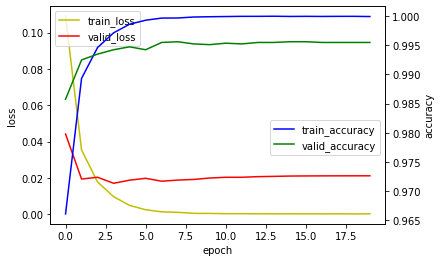

In [ ]:
def display(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
    acc_ax.set_xlabel('epoch')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

    plt.show()

display(hist)

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200
                 )

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/100
300/300 [==============================] - 3s 9ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0260 - val_accuracy: 0.9934
Epoch 2/100
300/300 [==============================] - 3s 8ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 3/100
300/300 [==============================] - 2s 8ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 0.0253 - val_accuracy: 0.9936
Epoch 4/100
300/300 [==============================] - 3s 8ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0237 - val_accuracy: 0.9939
Epoch 5/100
300/300 [==============================] - 3s 8ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0225 - val_accuracy: 0.9944
Epoch 6/100
300/300 [==============================] - 3s 8ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0271 - val_accuracy: 0.9942
Epoch 7/100
300/300 [==============================] - 3s 8ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0197 - val_accuracy: 0.9948

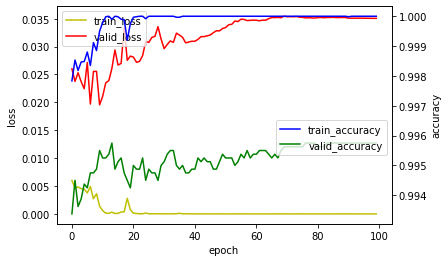

In [ ]:
display(hist)

In [ ]:
!nvidia-smi

Fri Jul 23 04:02:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |   1246MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_FOLDER_PATH = '/content/drive/MyDrive/best_model/CNN_MODEL' # constant는 일반적으로 대문자로 표현

"""
# hist.history.keys() 여기서 가져옴
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
"""
model_file_path = f'{MODEL_SAVE_FOLDER_PATH}/mnint-{{epoch:d}}-{{val_loss:.5f}}-{{val_accuracy:.5f}}.hdf5' 

cb_checkpoint = ModelCheckpoint(
                                                            filepath=model_file_path,
                                                            moniter='val_accuracy',
                                                            verbose=1,
                                                            save_best_only=True
                                                        )
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping]
                 )

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

Epoch 1/100
300/300 [==============================] - 3s 9ms/step - loss: 0.2425 - accuracy: 0.9232 - val_loss: 0.0452 - val_accuracy: 0.9854

Epoch 00001: val_loss improved from inf to 0.04519, saving model to /content/drive/MyDrive/best_model/CNN_MODEL/mnint-1-0.04519-0.98537.hdf5
Epoch 2/100
300/300 [==============================] - 2s 8ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0336 - val_accuracy: 0.9887

Epoch 00002: val_loss improved from 0.04519 to 0.03360, saving model to /content/drive/MyDrive/best_model/CNN_MODEL/mnint-2-0.03360-0.98875.hdf5
Epoch 3/100
300/300 [==============================] - 2s 8ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0229 - val_accuracy: 0.9927

Epoch 00003: val_loss improved from 0.03360 to 0.02285, saving model to /content/drive/MyDrive/best_model/CNN_MODEL/mnint-3-0.02285-0.99275.hdf5
Epoch 4/100
300/300 [==============================] - 2s 8ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0213 - val_accuracy: 0

In [ ]:
saved_path = '/content/drive/MyDrive/best_model/CNN_MODEL/mnint-5-0.02022-0.99262.hdf5'

model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9890


# **BatchNormalization**

In [ ]:
from tensorflow.keras.layers import BatchNormalization

class ConvBNRelu(Model):
    def __init__(self, filters, kernel_size=3, strides=(1, 1), padding='same'):
        super(ConvBNRelu, self).__init__()
        self.conv = layers.Conv2D(filters, 
                                  kernel_size=kernel_size, 
                                  strides=strides, 
                                  padding=padding, 
                                  kernel_initializer='glorot_normal'
                                  )
        self.batchnorm = BatchNormalization()

    def call(self, input, training=False):
        layer = self.conv(input)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)

        return layer


NameError: ignored

In [ ]:
class DenseBNRelu(Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = BatchNormalization()

    def call(self, input, training=False):
        layer = self.dense(input)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)

        return layer

In [ ]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size= [3, 3], padding='valid')
        self.pool1 = layers.MaxPooling2D(padding='same')
        self.conv2 = ConvBNRelu(64, (3, 3), padding='same')
        self.pool2 = layers.MaxPooling2D(padding='same')
        self.conv3 = ConvBNRelu(128, (3, 3), padding='same')
        self.conv3_flat = layers.Flatten()
        self.dense4 = DenseBNRelu(256)
        self.drop4 = layers.Dropout(rate=0.2)
        self.dense5 = layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax')

    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.conv3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

        return net

model = MNISTModel()
temp_input = layers.Input(shape=(28, 28, 1))
model(temp_input)
model.summary()

In [ ]:
learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=100,
                 batch_size=200,
                 callbacks=[cb_checkpoint, cb_early_stopping])

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_accuracy)

In [ ]:
saved_path = '/content/drive/MyDrive/best_model/CNN_MODEL/mnint-5-0.02022-0.99262.hdf5'

model.load_weights(saved_path)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

In [ ]:
from tensorflow.keras.applications import VGG16 # VGG16 layer를 가져옴
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# VGG에 맞는 이미지로 바꾸기위해 데이터 reset

In [ ]:
train_images.shape, test_images.shape

In [ ]:
train_images = train_images.reshape(-1, 784).astype('float32') # VGG는 color라서 3차원으로 바꿔야함
test_images = test_images.reshape(-1, 784).astype('float32')

In [ ]:
train_images.shape, test_images.shape

In [ ]:
train_images = np.dstack([train_images] *3) # 3차원으로 쌓는 다는 것
test_images = np.dstack([test_images] *3)
train_images.shape, test_images.shape

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 3)
test_images = test_images.reshape(-1, 28, 28, 3)
train_images.shape, test_images.shape

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in test_images])
train_images.shape, test_images.shape

In [ ]:
train_images = train_images/255.# resizing을 했으니 정규화
test_images = test_images/255.
valid_images, test_images, valid_labels, test_labels  = train_test_split(test_images,
                                                                         test_labels,
                                                                         test_size=0.2,
                                                                         shuffle=True)

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [ ]:
vgg_model.summary()

In [ ]:
layer_dict = {layer.name : layer for layer in vgg_model.layers} # 데이터에 맞는 fully connect 해야함
layer_dict

In [ ]:
#Functional API 
x = layer_dict['block2_pool'].output # block2_pool 까지 흐름을 씀
"""
'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f41aacfc410>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f41aab02d50>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f41aacfcfd0>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f41aad35510>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f41aacc4910>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f41aab06450>,
"""

x = ConvBNRelu(filters=64, kernel_size=(3, 3))(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

In [ ]:
custom_model = Model(inputs=vgg_model.input, outputs=x)
custom_model.summary()
"""
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
conv_bn_relu_19 (ConvBNRelu) (None, 12, 12, 64)        74048      =====> 여기서부터 위에 만들어놓은 것들을 붙임
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               590080    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
"""

In [ ]:
for layer in custom_model.layers[:7]:
    layer.trainable = False # conv_bn_relu_19 (ConvBNRelu) (None, 12, 12, 64)        74048   이 위로는 back propagation을 안하겠다는 것 
    # ==> VGG16의 weight를 쓰되, 업데이트는 안하겠다는 것



learning_rate = 0.001
batch_size = 100

lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, 
                                                          train_images.shape[0]/batch_size*5, 
                                                          0.5, 
                                                          staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

custom_model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = custom_model.fit(train_images, train_labels, 
                 validation_data = (valid_images, valid_labels), 
                 epochs=50,
                 batch_size=200,
                #  callbacks=[cb_checkpoint, cb_early_stopping]
                 )



In [ ]:
test_loss, test_accuracy = custom_model.evaluate(test_images, test_labels)
print(test_accuracy)